# **FACIAL** **EMOTION** **RECOGNITION**

1.**IMPORTING** **DATASET**

In [55]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/fer2013.zip"
extract_to = "/content/fer2013"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(" Dataset extracted to:", extract_to)


 Dataset extracted to: /content/fer2013


IMPORT LIBARRY

In [57]:
import tensorflow as tf


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix


2.** Data Preprocessing & Augmentation**

In [59]:
# Updated path to the correct structure
train_dir = '/content/fer2013/images/train'
val_dir = '/content/fer2013/images/validation'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Build CNN Model

In [60]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,911 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

Compile and Train the Model

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.2236 - loss: 2.1215 - val_accuracy: 0.2856 - val_loss: 1.7855
Epoch 2/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2888 - loss: 1.7505 - val_accuracy: 0.3873 - val_loss: 1.5679
Epoch 3/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.3201 - loss: 1.6846 - val_accuracy: 0.3967 - val_loss: 1.6216
Epoch 4/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.3547 - loss: 1.6263 - val_accuracy: 0.4312 - val_loss: 1.4583
Epoch 5/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.3829 - loss: 1.5832 - val_accuracy: 0.4583 - val_loss: 1.4002
Epoch 6/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.3892 - loss: 1.5581 - val_accuracy: 0.4659 - val_loss: 1.4302
Epoch 7/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.4063 - loss: 1.5276 - val_accuracy: 0.4837 - val_loss: 1.3736
Epoch 8/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4186 - loss: 1.5091 - 

Model Evaluation: Accuracy, Precision, Recall, F1-Score

In [62]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Classification Report
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(val_generator.classes, y_pred))


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4902 - loss: 1.2903
Validation Accuracy: 55.17%
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
              precision    recall  f1-score   support

           0       0.39      0.56      0.46       960
           1       0.00      0.00      0.00       111
           2       0.46      0.13      0.20      1018
           3       0.80      0.76      0.78      1825
           4       0.52      0.55      0.53      1216
           5       0.40      0.52      0.45      1139
           6       0.65      0.73      0.69       797

    accuracy                           0.55      7066
   macro avg       0.46      0.46      0.44      7066
weighted avg       0.55      0.55      0.53      7066



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Visualize Training Performance

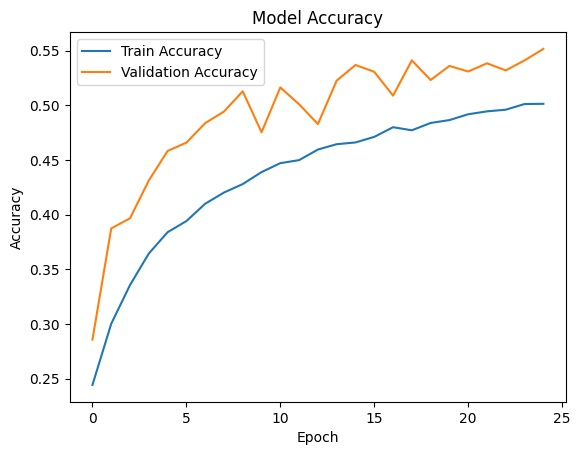

In [63]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [64]:
import cv2

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Use cv2.VideoCapture(0) for webcam input
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (48, 48))
    face = face / 255.0
    face = face.reshape(1, 48, 48, 1)

    prediction = model.predict(face)
    emotion = emotion_labels[np.argmax(prediction)]

    cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Real-Time Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [65]:
pip install streamlit


Test with Custom Images

In [66]:
def predict_emotion(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img / 255.0
    img = img.reshape(1, 48, 48, 1)
    prediction = model.predict(img)
    emotion = np.argmax(prediction)
    print(f"Predicted Emotion Class: {emotion}")


In [67]:
# Import the necessary packages
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
data = r'/content/fer2013/images/train'
img_data = ImageFolder(data)

In [68]:
# Data augmentation for training
train_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# No augmentation for validation
test_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Subset

# Step 1: Extract all targets from your dataset
labels = [label for _, label in img_data]

# Step 2: Initialize stratified splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Step 3: Get train/test indices
for train_idx, test_idx in splitter.split(X=labels, y=labels):
    train_set = Subset(img_data, train_idx)
    test_set = Subset(img_data, test_idx)

In [70]:
Emotion_labels = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Neutral",
    5:"Sad",
    6:"Surprise"
}

In [71]:
from torchvision.datasets import DatasetFolder
from torch.utils.data import Dataset

class TransformWrapper(Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        img, label = self.subset[idx]
        return self.transform(img), label

    def __len__(self):
        return len(self.subset)

In [72]:
train_dataset = TransformWrapper(train_set, train_transform)
test_dataset = TransformWrapper(test_set, test_transform)

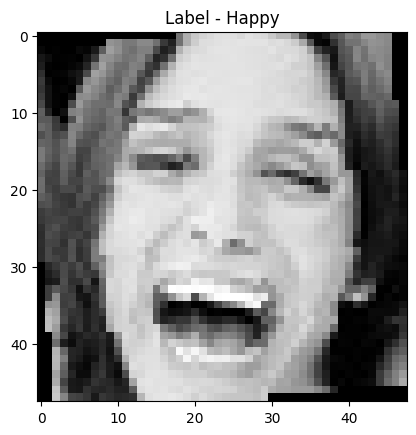

In [73]:
import matplotlib.pyplot as plt
img, label = train_dataset[80]
img = img.permute(1,2,0)
plt.imshow(img)
plt.title(f"Label - {Emotion_labels[label]}")
plt.show()

In [74]:
from collections import Counter

train_labels = [img_data.targets[i] for i in train_set.indices]
test_labels = [img_data.targets[i] for i in test_set.indices]

print("Train label counts:", Counter(train_labels))
print("Test label counts:", Counter(test_labels))

Train label counts: Counter({3: 5731, 4: 3986, 5: 3950, 2: 3282, 0: 3194, 6: 2564, 1: 349})
Test label counts: Counter({3: 1433, 4: 996, 5: 988, 2: 821, 0: 799, 6: 641, 1: 87})


In [75]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [76]:
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes # Ground truth labels

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


In [77]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall: {rec:.2%}")
print(f"F1 Score: {f1:.2%}")

Accuracy: 55.17%
Precision: 55.15%
Recall: 55.17%
F1 Score: 53.45%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
